<a href="https://colab.research.google.com/github/AltrosMado/Ai-AcceleratorPilosophyBot/blob/vsharma/PhilosophyEDA_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import statements for libraries for Data Analysis




In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import nltk
import ast
import re

import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Retrive the dataset itself

In [ ]:
df = pd.read_csv("https://media.githubusercontent.com/media/AltrosMado/Ai-AcceleratorPilosophyBot/refs/heads/vsharma/datasets/philosophy_data.csv")

# Analyze the Data in the Dataset


In [ ]:
df = pd.read_csv("https://media.githubusercontent.com/media/AltrosMado/Ai-AcceleratorPilosophyBot/refs/heads/vsharma/datasets/philosophy_data.csv")
# Sample a random entry to check its content
sample_entry = df['tokenized_txt'].sample(1).values[0]
print("Sample entry:", sample_entry)

# Check for unwanted tokens like empty strings, individual characters, or spaces
invalid_tokens = [token for token in sample_entry if len(token) < 2]  # Check for short tokens (like '', 'e', ' ', 't')
print("Invalid tokens found in the sample:", invalid_tokens)

Sample entry: ['accepting', 'the', 'emendation', 'ousias', 'empsuchou']
Invalid tokens found in the sample: ['[', "'", 'a', 'c', 'c', 'e', 'p', 't', 'i', 'n', 'g', "'", ',', ' ', "'", 't', 'h', 'e', "'", ',', ' ', "'", 'e', 'm', 'e', 'n', 'd', 'a', 't', 'i', 'o', 'n', "'", ',', ' ', "'", 'o', 'u', 's', 'i', 'a', 's', "'", ',', ' ', "'", 'e', 'm', 'p', 's', 'u', 'c', 'h', 'o', 'u', "'", ']']


Printing out the first 5 rows of the dataset

In [ ]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


Printing out the meta data of the dataset(i.e: Col Names, dataType, any null values, etc..)

In [ ]:
df.info()
df['sentence_lowered'][0]
# Results:
## No null values in any rows
## 11 Column Entries
## 360808 data entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


" what's new, socrates, to make you leave your usual haunts in the lyceum and spend your time here by the king archon's court?"

Checking directly if there are any null values or duplicated rows and the dimensions of the data

In [ ]:
# Any null values
df.isnull().values.any()

False

In [ ]:
#Any duplicated rows
df.duplicated().sum()

0

In [ ]:
#Data Dimensions
print("Dimensions:", df.shape)

Dimensions: (360808, 11)


#Viewing Data visually

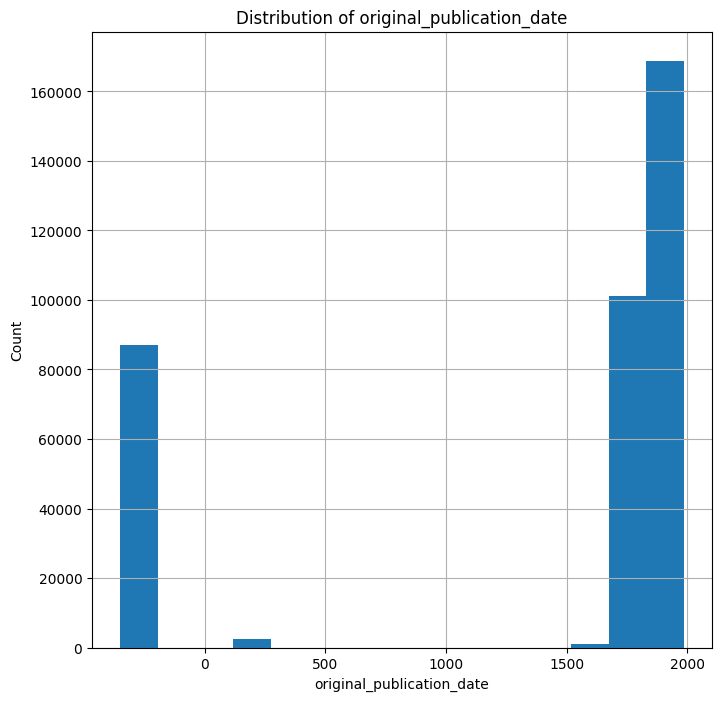

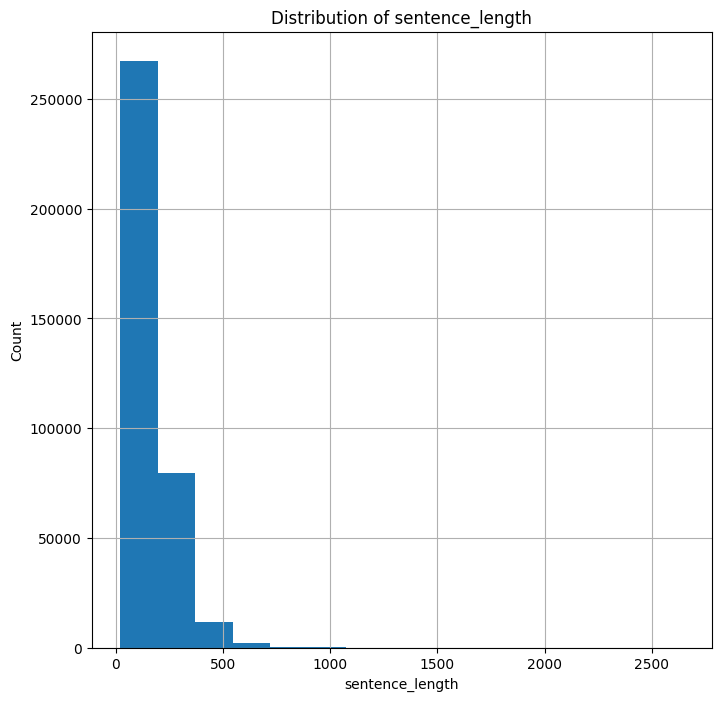

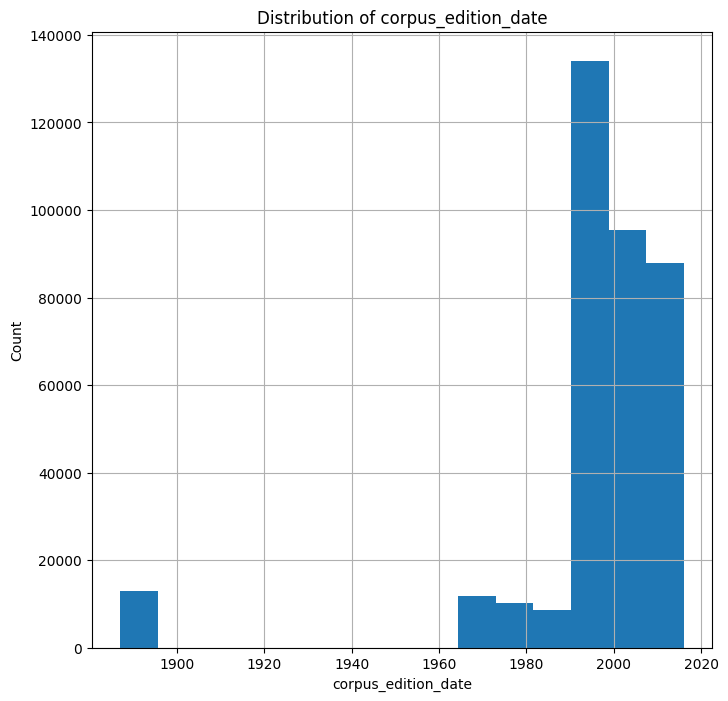

In [ ]:
data = ['original_publication_date', 'sentence_length', 'corpus_edition_date']
for index in data:
  df[index].hist(bins=15, figsize=(8, 8))
  plt.title(f'Distribution of {index}')
  plt.xlabel(index)
  plt.ylabel('Count')
  plt.show()

What is interesting about the dataset is that is there is a gap between of 0 and 1500 years in the original publication dates. This mean then that the dataset focuses on texts that were published during the times of plato and aristotle and the modern day.

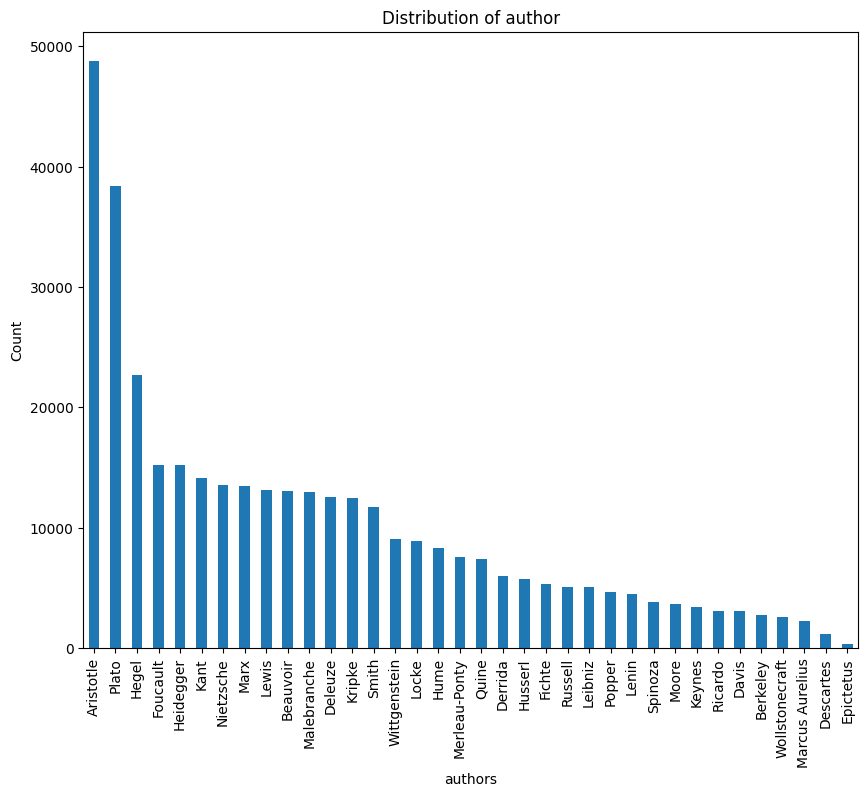

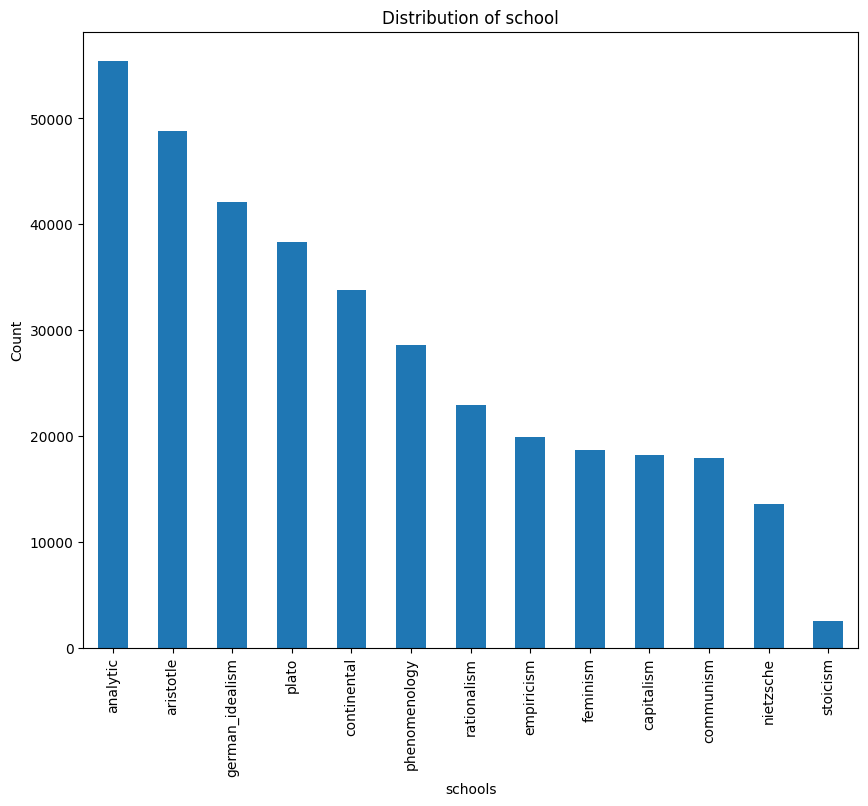

In [ ]:
categorical_features = ['author', 'school']
for feature in categorical_features:
    plt.figure(figsize=(10, 8))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature + "s")
    plt.ylabel('Count')
    plt.show()

With this focus on analytic as a school of philosophy, the data skews toward consepts of western philosophy. This could lead to bad prompts which show the actions of a underfitted model.

##Using NLTK to read and edit natual language

In [68]:
# Prints a random sentence in the dataset in the lowered sentence column
example = df['sentence_lowered'].sample(n=1).values[0]
print(example)

so long as you express your views in lengthy speeches in your own style


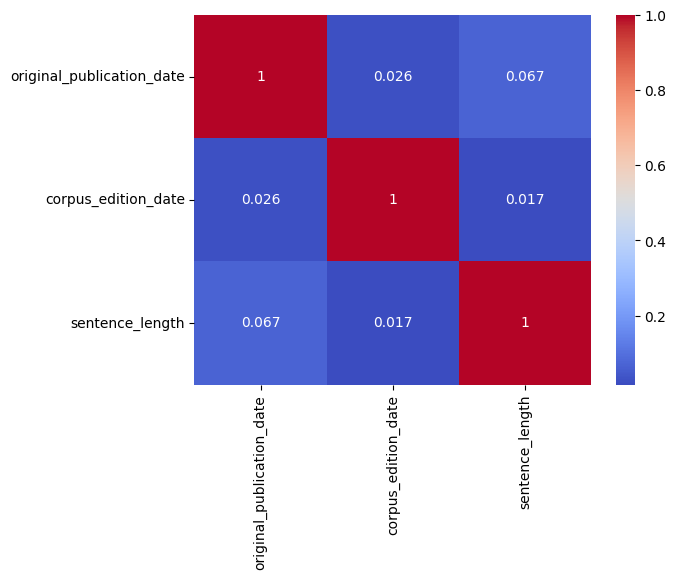

In [ ]:
df_drp = df.drop(['title', 'author', 'school', 'sentence_spacy',	'sentence_str', 'sentence_lowered',	'tokenized_txt',	'lemmatized_str'], axis=1)
sns.heatmap(df_drp.corr(), annot=True, cmap='coolwarm')
plt.show()

## Top 5 of the most used words in the dataset

In [ ]:
tokenList = df['tokenized_txt'].apply(ast.literal_eval)
all_strings = list(itertools.chain(*tokenList))

cleaned_strings = [re.sub(r'[^a-zA-Z]', '', word) for word in all_strings]

# Count the occurrences of each word using Counter
word_counts = Counter(cleaned_strings)

# Get the top 5 most frequent strings
top_20_words = word_counts.most_common(20)

# Print the top 5 words and their counts
print(top_20_words)

[('the', 660444), ('of', 422626), ('and', 271548), ('to', 260476), ('is', 235136), ('in', 220195), ('that', 175098), ('it', 153145), ('as', 106479), ('be', 94540), ('for', 86780), ('not', 83436), ('which', 81708), ('this', 79114), ('are', 72531), ('or', 67068), ('but', 66023), ('we', 60538), ('by', 60455), ('with', 53765)]


#Sentiment Analysis (VADER)

In [ ]:
sia = SentimentIntensityAnalyzer()

sentiment_scores = df['sentence_lowered'].apply(sia.polarity_scores)

# Convert the results into separate columns: 'neg', 'neu', 'pos', 'compound'
sentiment_df = sentiment_scores.apply(pd.Series)

# Merge the sentiment columns back into the original DataFrame
df_with_sentiment = pd.concat([df, sentiment_df], axis=1)

# Display the DataFrame with the new sentiment score columns
df_with_sentiment.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,neg,neu,pos,compound
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...",0.132,0.868,0.000,-0.2960
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,0.000,0.791,0.209,0.4404
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,0.192,0.808,0.000,-0.3346
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,0.000,1.000,0.000,0.0000
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...",0.000,1.000,0.000,0.0000


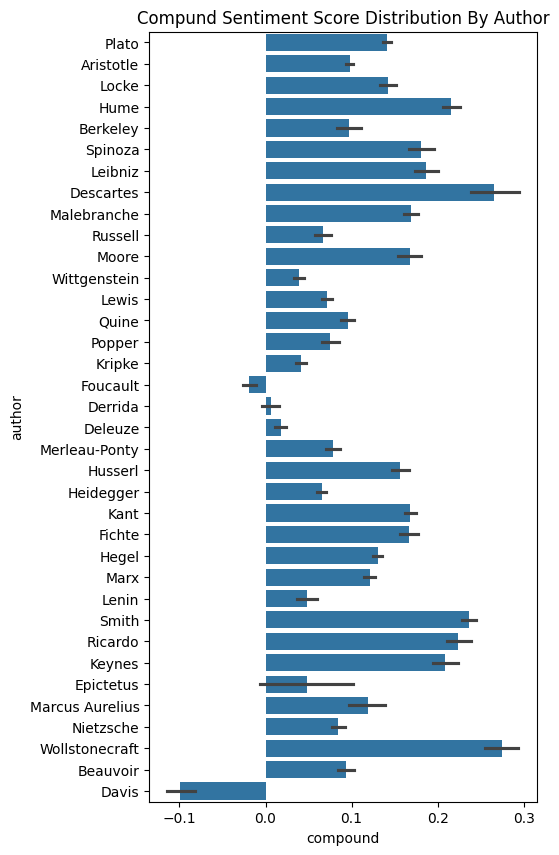

In [ ]:
plt.figure(figsize=(5, 10))
plt.title('Compund Sentiment Score Distribution By Author')
sns.barplot(x='compound', y='author', data=df_with_sentiment)
plt.show()


Looking at the vader sentiment analysis, most works of each author stem towards the positive direction except for Davis, Fauclault and derrida